<a href="https://colab.research.google.com/github/Anuj-Bansal1/project/blob/main/flower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os 
import PIL
import cv2
import pathlib

In [4]:
data_dir = r"/content/drive/MyDrive/Colab Notebooks/datasets/flower"
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower')

In [5]:
image_count = len(list(data_dir.glob("*\*\*.jpg")))
image_count

0

In [6]:
rose = list(data_dir.glob('*/rose/*'))
rose

[PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/14414100710_753a36fce9.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/15951588433_c0713cbfc6_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/14414123198_24606fb32d.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/15333843782_060cef3030.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/16152205512_9d6cb80fb6.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/14176042519_5792b37555.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/15202632426_d88efb321a_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/14683774134_6367640585.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/rose/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('/content/d

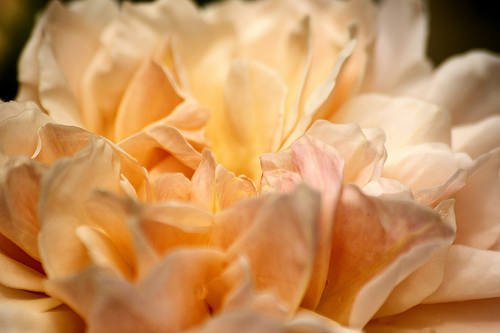

In [7]:
PIL.Image.open(str(rose[0]))

In [8]:
image_seg = {
    'rose':list(data_dir.glob('*/rose/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'tulip':list(data_dir.glob('*/tulip/*')),
    'sunflower':list(data_dir.glob('*/sunflower/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
}


In [9]:
image_seg['sunflower']

[PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/12471791574_bb1be83df4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/10386702973_e74a34c806_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/14244410747_22691ece4a_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/13648603305_1268eda8b7_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/12282924083_fb80aa17d4_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/10862313945_e8ed9202d9_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/10386525005_fd0b7d6c55_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower/10386503264_e05387e1f7_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower/train/sunflower

In [10]:
image_label = {
    'rose':0,
    'daisy':1,
    'tulip':2,
    'sunflower':3,
    'dandelion':4,
}


In [11]:
x,y =[],[]
for flower,images in image_seg.items():
  for image in images:
    i=0
    img = cv2.imread(str(image_seg[flower][i]))
    resized = cv2.resize(img,(180,180))
    x.append(resized)
    y.append(image_label[flower])

In [12]:
y[:6]

[0, 0, 0, 0, 0, 0]

In [13]:
x=np.array(x)
y=np.array(y)
x=x/255

In [14]:
x[6]

array([[[0.0745098 , 0.29019608, 0.4627451 ],
        [0.0745098 , 0.30588235, 0.4745098 ],
        [0.07843137, 0.32156863, 0.48627451],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.07058824, 0.29019608, 0.45490196],
        [0.07058824, 0.30588235, 0.46666667],
        [0.07843137, 0.32156863, 0.47843137],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.07058824, 0.29019608, 0.45098039],
        [0.06666667, 0.30588235, 0.45882353],
        [0.0745098 , 0.31764706, 0.4745098 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.46666667, 0.58823529, 0.71372549],
        [0.46666667, 0.59215686, 0.71372549],
        [0.48235294, 0

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,shuffle = True)

In [24]:
model = keras.Sequential([
    #cnn
    keras.layers.Conv2D(65,input_shape=(180, 180, 3),kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(25,kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(5,kernel_size=(3,3),activation ="relu"),
    keras.layers.MaxPool2D(),
    #ann
    keras.layers.Flatten(),
    keras.layers.Dense(65,activation ="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(55,activation ="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(35,activation ="relu"),
    keras.layers.Dense(5,activation ="sigmoid"),
    
    
])


In [25]:
model.compile(optimizer= "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [26]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 4s 44ms/step - loss: 0.4209 - accuracy: 0.8456
Epoch 2/50
69/69 [==============================] - 3s 42ms/step - loss: 0.0349 - accuracy: 0.9904
Epoch 3/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0134 - accuracy: 0.9954
Epoch 4/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0227 - accuracy: 0.9918
Epoch 5/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 6/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0078 - accuracy: 0.9964
Epoch 7/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 8/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0049 - accuracy: 0.9986
Epoch 9/50
69/69 [==============================] - 3s 42ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 10/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 11/

In [27]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [31]:
prediction = model.predict(x_test)
pridicted = [np.argmax(i) for i in prediction]

18/18 [==============================] - 0s 19ms/step
